In [1]:
# Name: Cynthia Nosiri
# Class: EEGR 565.M85 - Machine Learning Applications
  
# Google drive link: https://drive.google.com/drive/u/1/folders/1wfpz_NNgaTEoBpIPjvxFd_d_A39B_fTS

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

# read the csv file
file = pd.read_csv('spam.csv', delimiter = ',')

In [3]:
# print the first five rows of the data
first_five = file.head()
print(first_five)

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# remove unneeded columns
file = file[['label', 'message']]
file.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# removing stopwords, make all lowercase
import nltk
from nltk.corpus import stopwords, names
nltk.download("all")

stopwords = stopwords.words('english')
file['message']  = file['message'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(file.head())


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/cynth/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to /Users/cynth/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/cynth/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to /Users/cynth/nltk_data...
[nltk_data]    |   Package pil is already up-to-date!
[nltk_data]    | Downloading package

  label                                            message
0   ham  go jurong point, crazy.. available bugis n gre...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham          u dun say early hor... u c already say...
4   ham          nah i think goes usf, lives around though


In [6]:
# # # remove non-alphabetic tokens     

def alphabets(element):
    return element.isalpha()



In [7]:
# lemmatize and remove proper nouns
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

new_message = []
for x in file['message']:
    new_message.append(" ".join(lemmatizer.lemmatize(y.lower()) for y in x.split() if alphabets(y) and y not in names.words()))
    



In [8]:
new_message



['go jurong available bugis n great world la e cine got amore',
 'ok joking wif u',
 'free entry wkly comp win fa cup final tkts may text fa receive entry txt apply',
 'u dun say early u c already',
 'nah i think go life around though',
 'freemsg hey darling word like fun tb xxx std chgs rcv',
 'even brother like speak they treat like aid',
 'a per request melle minnaminunginte nurungu set callertune press copy friend callertune',
 'a valued network customer selected receivea prize to claim call claim code valid hour',
 'had mobile month u r entitled update latest colour mobile camera call the mobile update co free',
 'gonna home soon want talk stuff anymore cried enough',
 'six chance win from pound send cost tsandcs apply reply hl info',
 'you week free membership prize txt claim lccltd pobox',
 'searching right word thank i promise wont take help granted fulfil you wonderful blessing',
 'i have a date on sunday with',
 'to use click wap link next txt message click',
 'oh watching',


In [9]:
file['message'] = new_message
file.head()

,label,message
0,ham,go jurong available bugis n great world la e c...
1,ham,ok joking wif u
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early u c already
4,ham,nah i think go life around though


In [10]:
# convert label to numerical variable
file['label_id'] = file.label.map({'ham': 0, 'spam': 1})
file.head()

,label,message,label_id
0,ham,go jurong available bugis n great world la e c...,0
1,ham,ok joking wif u,0
2,spam,free entry wkly comp win fa cup final tkts may...,1
3,ham,u dun say early u c already,0
4,ham,nah i think go life around though,0


In [11]:
# get my important columns. X contains features while Y contains targets
X = file['message']
Y = file['label_id']
# print(X)
# print(Y)

In [12]:
from sklearn.model_selection import train_test_split

# split dataset into training set and test set
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
# print(X_train.shape)
# print(x_test.shape)
# print(Y_train.shape)
# print(y_test.shape)

In [13]:
# text classification using tfidfvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = 'word', max_features=5000)

# fit and transform the training features
vec =  tfidf.fit_transform(X_train)

# transform the test features
vec_test = tfidf.transform(x_test)
# print(vec)




# Step1: SVM Classifer- Linear

In [14]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(vec, Y_train)
y_pred = clf.predict(vec_test)

In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print("F1score:", f1_score(y_test, y_pred))

Accuracy: 0.9772727272727273
F1score: 0.9073170731707317


# why is the accuracy high but not the f1-score?


# SVM classifier with RBF kernel

In [17]:
from sklearn import svm
all_accuracy = []
all_f1score = []
for i in range(1, 11):
    clf1 = svm.SVC(kernel = 'rbf', gamma = i)
    clf1.fit(vec, Y_train)
    y_pred1 = clf1.predict(vec_test)
    all_accuracy.append(metrics.accuracy_score(y_test, y_pred1))
    all_f1score.append(f1_score(y_test, y_pred1))
print("Best Accuracy is :", max(all_accuracy))
print("Best F1 score is {} at gamma {}".format( max(all_f1score), np.argmax(all_f1score)+1))   

Best Accuracy is : 0.97188995215311
Best F1 score is 0.881012658227848 at gamma 1


# Logistic Regression classifier

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(vec, Y_train)
y_pred2 = logreg.predict(vec_test)
print("Accuracy: ", logreg.score(vec_test, y_test))
print("F1score:", f1_score(y_test, y_pred2))

Accuracy:  0.9455741626794258
F1score: 0.743661971830986


# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(vec, Y_train)
y_pred3 = clf2.predict(vec_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))
print("F1score:", f1_score(y_test, y_pred3))

Accuracy: 0.9461722488038278
F1score: 0.7916666666666666


# Random forest classifier

In [20]:
all_accuracy1 = []
all_f1score1  = []
from sklearn.ensemble import RandomForestClassifier
for i in range(1, 500):
    clf3 = RandomForestClassifier(n_estimators= i)
    clf3.fit(vec, Y_train)
    y_pred4 = clf3.predict(vec_test)
    all_accuracy1.append(metrics.accuracy_score(y_test, y_pred4))
    all_f1score1.append(f1_score(y_test, y_pred4))
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))
# print("F1score:", f1_score(y_test, y_pred4))

Best f1score 0.9  occurred with 357 trees


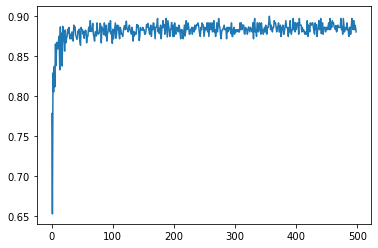

In [21]:
# graph of f1
import matplotlib.pyplot as plt
plt.plot(range(len(all_f1score1)), all_f1score1)
print('Best f1score {}  occurred with {} trees'.format(max(all_f1score1), np.argmax(all_f1score1)+1))

# Step 4 : show decision path through tree

In [54]:
x_test.tolist()

['funny fact nobody teach volcano tsunami hurricane sway aroundn teach hw choose wife natural disaster happens',
 'i sent score sophas secondary application i think thinking research cost contact joke school one le expensive one',
 'we know someone know fancy call find pobox',
 'only promise getting soon and text morning let know made',
 'congratulation ur awarded either cd gift voucher free entry weekly draw txt music tncs',
 'text carlos let hang',
 'see',
 'no',
 'get gandhipuram walk cross cut right side street road turn first',
 'you flippin shit',
 'for real tho i even cook whole electricity and',
 'free tone hope enjoyed new text stop provided',
 'wif buying tix',
 'call u finish come n pick',
 'dear did talk',
 'do want come',
 'were somewhere fredericksburg',
 'your mobile awarded bonus caller prize our final attempt contact call',
 'when come',
 'u bored come',
 'can call make sure dat woken',
 'i love u hogolo gold chain kodstini agalla necklace madstini agalla hogli mutai e

In [62]:
x_test.index.tolist()

[3245,
 944,
 1044,
 2484,
 812,
 2973,
 2991,
 2942,
 230,
 1181,
 1912,
 1992,
 5435,
 4805,
 401,
 1859,
 1344,
 2952,
 501,
 3337,
 1945,
 3142,
 2422,
 381,
 5567,
 4937,
 79,
 5240,
 2554,
 5345,
 4379,
 4789,
 683,
 5519,
 4315,
 393,
 5541,
 4546,
 3599,
 2225,
 881,
 4625,
 3997,
 5015,
 23,
 4479,
 1215,
 1961,
 5339,
 848,
 4294,
 2664,
 3407,
 351,
 3492,
 3103,
 3315,
 1881,
 3504,
 2380,
 1598,
 4733,
 3299,
 439,
 2903,
 1186,
 1728,
 3975,
 3050,
 1128,
 4500,
 315,
 296,
 3298,
 3864,
 8,
 5003,
 2968,
 5194,
 2157,
 3669,
 4730,
 5349,
 2388,
 2575,
 4085,
 4328,
 3467,
 2245,
 4269,
 33,
 1281,
 5145,
 2598,
 3532,
 1253,
 4707,
 2658,
 3479,
 4483,
 4700,
 3116,
 3785,
 3547,
 1039,
 3859,
 4383,
 3403,
 3710,
 1643,
 1055,
 1817,
 2780,
 290,
 2972,
 319,
 1467,
 1335,
 1419,
 3548,
 4388,
 5156,
 2462,
 3494,
 5209,
 964,
 553,
 2932,
 2801,
 5178,
 3872,
 2841,
 1033,
 2231,
 809,
 538,
 4121,
 1103,
 346,
 3318,
 4738,
 1870,
 696,
 4160,
 2536,
 2650,
 4808,
 5

In [67]:
print(y_test.head(20))

3245    0
944     0
1044    1
2484    0
812     1
2973    0
2991    0
2942    0
230     0
1181    0
1912    0
1992    1
5435    0
4805    0
401     0
1859    0
1344    0
2952    1
501     0
3337    0
Name: label_id, dtype: int64


In [59]:
clf2.predict(vec_test).tolist() 

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [63]:
file[file['label'] == 'spam']

,label,message,label_id
2,spam,free entry wkly comp win fa cup final tkts may...,1
5,spam,freemsg hey darling word like fun tb xxx std c...,1
8,spam,a valued network customer selected receivea pr...,1
9,spam,had mobile month u r entitled update latest co...,1
11,spam,six chance win from pound send cost tsandcs ap...,1
...,...,...,...
5537,spam,want explicit sex ring cost gsex pobox,1
5540,spam,asked if chatlines inclu in free india cust se...,1
5547,spam,had contract mobile latest nokia double min te...,1
5566,spam,reminder from to get pound free call credit de...,1


In [31]:
n_nodes = clf2.tree_.node_count
children_left = clf2.tree_.children_left
children_right = clf2.tree_.children_right
feature = clf2.tree_.feature
threshold = clf2.tree_.threshold

In [32]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # checking for a split node
    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

In [76]:
node_indicator = clf2.decision_path(vec_test)
leaf_id = clf2.apply(vec_test)

sample_id = 0
obs = 1

for a in [2, 5, 8]:
    sample_id = a
    print('Observation {}:'.format(obs))


  # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
    node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
  ]


    for node_id in node_index:
      # continue to the next node if it is a leaf node
          if leaf_id[sample_id] == node_id:
              continue

      # check if value of the split feature for sample 0 is below threshold
          if vec_test[sample_id, feature[node_id]] <= threshold[node_id]:
              threshold_sign = "<="
          else:
                  threshold_sign = ">"

          print(
          "node#{node} {feature} "
          "{inequality} {threshold} [{value}]".format(
              node=node_id,
              feature=tfidf.get_feature_names()[feature[node_id]],
              value=vec_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id],
          )
      )
    obs+=1
    print('\n')



Observation 1:
node#0 call > 0.1121053546667099 [0.21081256371978835]
node#970 call <= 0.31006740033626556 [0.21081256371978835]
node#971 work <= 0.1060076579451561 [0.0]
node#972 go <= 0.08485197275876999 [0.0]
node#973 call <= 0.2338259369134903 [0.21081256371978835]
node#974 so <= 0.20668263733386993 [0.0]
node#975 one <= 0.08350570499897003 [0.0]
node#976 ok <= 0.13169677555561066 [0.0]
node#977 if <= 0.21175117045640945 [0.0]
node#978 pls <= 0.2189779356122017 [0.0]
node#979 me <= 0.10022604465484619 [0.0]
node#980 gonna <= 0.13513606786727905 [0.0]
node#981 need <= 0.13421298563480377 [0.0]
node#982 hr <= 0.12852679193019867 [0.0]
node#983 about <= 0.1832669973373413 [0.0]
node#984 may <= 0.3005460649728775 [0.0]
node#985 home <= 0.14423750340938568 [0.0]
node#986 mumhas <= 0.23975257575511932 [0.0]


Observation 2:
node#0 call <= 0.1121053546667099 [0.0]
node#1 txt <= 0.0691179558634758 [0.0]
node#2 reply <= 0.1521388366818428 [0.0]
node#3 text > 0.13017766177654266 [0.335742236

# Based on your observations, what general statements can you make about how the decision tree classifier works?